In [55]:
#Import relevant packages
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

#Read the data
df_pres = pd.read_csv('data/transport_performance.csv', sep=';')
df_mob= pd.read_csv('data/mobiliteit.csv', sep=';')

In [56]:
#Initialise prestation data
df_pres['Periods'] = pd.to_numeric(df_pres['Periods'], errors='coerce')
df_pres['Transport performance (billion passenger kilometres )'] = pd.to_numeric(df_pres['Transport performance (billion passenger kilometres )'], errors='coerce')

#Rename columns
df_pres.rename({'Transport performance (billion passenger kilometres )': 'Total travel'}, axis=1, inplace=True)

#Drop unnesecary columns
df_pres.drop('Margins', axis=1, inplace=True)
df_pres.drop('Population', axis=1, inplace=True)

df_pres.head()


,Modes of travel,Region characteristics,Periods,Total travel
0,Total,The Netherlands,2018,218.1
1,Total,The Netherlands,2019,218.8
2,Total,The Netherlands,2020,152.0
3,Total,The Netherlands,2021,168.4
4,Total,The Netherlands,2022,186.9


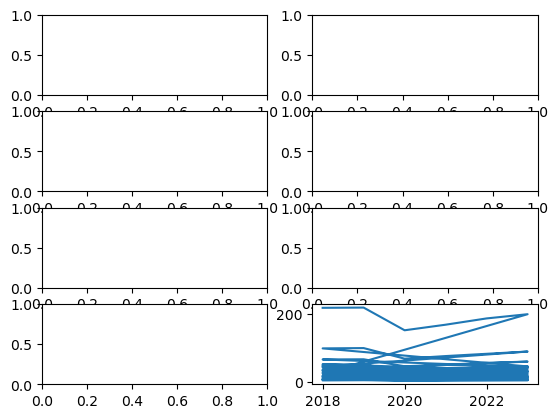

In [57]:
#Create plots
Modes = ['Total', 'Car']
pos=[]
fig, axs = plt.subplots(nrows=4, ncols=2)

for Mode in Modes:
    df = df_pres[df_pres['Modes of travel']==Mode]
    axs[1,1]= plt.plot(df['Periods'], df['Total travel'])

In [69]:
df=df_pres.loc[df_pres['Region characteristics']=='The Netherlands']
fig = px.line(df, x='Periods', y='Total travel', color='Modes of travel')
fig.show()

In [85]:
df = df_pres.loc[df_pres['Region characteristics'] == 'The Netherlands'].copy()

# Calculate the base value for each mode (first period)
base = df.groupby('Modes of travel')['Total travel'].transform('first')

# Create an index (relative to the first period)
df['Travel (km) index'] = df['Total travel'] / base * 100

fig = px.line(df, x='Periods', y='Travel (km) index', color='Modes of travel', 
              title='Relative change in travel kilometers split by travel mode', labels={'Periods' : 'Ýear'})
fig.add_hline(y=100, line_dash='dot')
fig.show()